## Install and import necessary packages

In [1]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

!pip install gym[atari]

!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python-opengl
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 32 not upgraded.
Need to get 7,814 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1

To activate virtual display we need to run a script once for training an agent, as follows:

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [3]:
# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [4]:
import gym
from gym import logger as gymlogger
from gym.wrappers.record_video import RecordVideo
gymlogger.set_level(40) # error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")


def wrap_env(env):
  env = RecordVideo(env, './video')
  return env

# OpenAI Gym

OpenAI gym is a python library that wraps many classical decision problems including robot control, videogames and board games. We will use the environments it provides to test our algorithms on interesting decision problems.

Gym documentation: https://www.gymlibrary.dev/content/basic_usage/#


Refer to the docstrings of github code to understand the attributes of the environment.

https://github.com/openai/gym/blob/dcd185843a62953e27c2d54dc8c2d647d604b635/gym/envs/classic_control/mountain_car.py#L18C1-L18C20

## Environment object

- env.observation_space : state space, all possible states.
- env.action_space : all possible actions the agent can take.
- env.state : Current state the agent is in.

- env.reset() : reset environment to initial state, return first observation
- env.render(): show current state.
- env.step(action) : commit action a and return (new observation, reward, is done, info)

## MountainCar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
action space: Discrete(3)
initial observation: [-0.57723576  0.        ]
action:  2

next observation: [-0.5758352   0.00140054]
reward: -1.0
done: False
info: {}


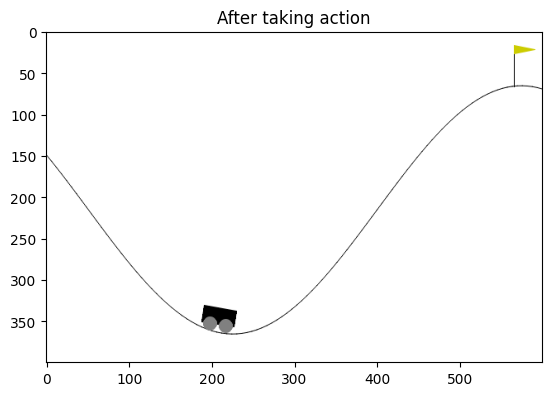

In [5]:
# env = gym.make('CartPole-v0')
env = gym.make('MountainCar-v0')

# env = wrap_env(env)

print('observation space:', env.observation_space)
print('action space:', env.action_space)

obs = env.reset()

print('initial observation:', obs)

action = env.action_space.sample()  # take a random action
print("action: ", action)

obs, r, done, info = env.step(action)
print('\nnext observation:', obs)
print('reward:', r)
print('done:', done)
print('info:', info)
plt.title("After taking action")
plt.imshow(env.render('rgb_array'))

### Random action

In [6]:
'''CartPole problem use random action'''
# env = gym.make('CartPole-v0')
env = gym.make('MountainCar-v0')
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()

total_reward = 0

while True:
  env.render()

  # your agent goes here
  action = env.action_space.sample()   # take a random action
  observation, reward, done, info = env.step(action)
  # print(reward)
  total_reward+=reward

  if done:
    break;

env.close()
show_video()
print(total_reward)

-200.0


### Intutive action
- Accelerate to the left when car is on the left.
- Accelerate to the right when the car is on the right.

In [7]:
env = gym.make('MountainCar-v0')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def policy(env):
  if env.state[1]>0:
    action = 2
  else:
    action = 1
  return action

In [9]:
env = gym.make('MountainCar-v0')
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()

while True:
  # env.render()

  # your agent goes here
  action = policy(env)   # take a random action
  observation, reward, done, info = env.step(action)
  # print(reward)

  if done:
    break;

env.close()
show_video()

## Frozen Lake

In [10]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
print("State space: ", env.observation_space)
print("Action space: ", env.action_space)
env.reset()
print("Current state: ",env.s)

State space:  Discrete(16)
Action space:  Discrete(4)
Current state:  0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Random action

In [11]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
env = wrap_env(env)  # defined before for rendering online

observation = env.reset()

while True:
  # your agent goes here
  action = env.action_space.sample()  # take a random action
  print(action)
  observation, reward, done, info = env.step(action)
  # print(reward)

  if done:
    break;

env.close()
show_video()

1
1
3
2


📔 Select a [gym environment](https://www.gymlibrary.dev/index.html) and understand the evironment's states, actions and rewards by going through the Openai Gym's [documentation](https://www.gymlibrary.dev/content/basic_usage/#) and [github codes](https://github.com/openai/gym/tree/master/gym/envs).
- Explain in your own words what the env is about and what needs to be achieved. Give a one liner explaining what the observation space and action space is for the selected environment.
- Import the environment and make the agent take "random actions". Print the total reward the agent received at the end of an episode.
- Calculate the average total reward by simulating multiple episodes. (atleast 1000)
- Try modifying the actions to maximise the total reward. If the chosen environment is complex to hardcode the actions, you can just explain in your own words.

In [12]:
env = gym.make("Taxi-v3")
print("State Space: ",env.observation_space)
print("Acton Space: ",env.action_space)
env.reset()

print("Current State: ",env.s)

State Space:  Discrete(500)
Acton Space:  Discrete(6)
Current State:  462


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
env = gym.make("Taxi-v3")
env = wrap_env(env)

observation = env.reset()

while True:
  action = env.action_space.sample()
  observation, reward , done , info = env.step(action)

  if done:
    break

env.close()
show_video()

Explain in your own words what the env is about and what needs to be achieved. Give a one liner explaining what the observation space and action space is for the selected environment.

The Taxi-v3 environment is a classic gridworld problem with a taxi navigating through a 5x5 grid. The taxi has to pick up a passenger at one location and drop them off at another location. The grid also contains walls, and there are four special locations - the passenger's starting position, the passenger's destination, the taxi's current position, and the destination for the taxi drop-off.

The observation space is a discrete space of size 500, representing the 25x5 grid cells of the environment. Each state corresponds to the possible combinations of the taxi's location, the passenger's location, and the destination location. The state is represented as a single integer between 0 and 499.

The action space is a discrete space of size 6, representing the six possible actions the agent can take at each state: move south, north, east, west, pick up the passenger, or drop off the passenger. The actions are represented as integers: 0 (south), 1 (north), 2 (east), 3 (west), 4 (pickup), and 5 (drop-off).

In this environment, the agent receives a reward of +20 for a successful drop-off, -1 for each time step, -10 for illegal pick-up or drop-off actions, and -1 for attempting to move through a wall. The goal of the agent is to maximize its cumulative reward while successfully picking up and dropping off the passenger.

### Calculate the average total reward by simulating multiple episodes. (atleast 1000)

In [14]:
env = env = gym.make("Taxi-v3")
env = wrap_env(env) # defined before for rendering online
# Number of episodes to simulate
num_episodes = 1000

# List to store total rewards for each episode
total_rewards = []

# Simulate episodes
for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0

    # Run the episode until it's done
    while True:
        # Replace this line with your agent's policy to choose an action
        action = env.action_space.sample()

        # Take a step in the environment
        next_state, reward, done, _ = env.step(action)

        # Accumulate the reward for this step
        episode_reward += reward

        # Check if the episode is done
        if done:
            break

        # Update the current state for the next step
        state = next_state

    # Store the total reward for this episode
    total_rewards.append(episode_reward)

# Calculate the average total reward
average_reward = np.mean(total_rewards)
print(average_reward)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-776.777


### Try modifying the actions to maximise the total reward. If the chosen environment is complex to hardcode the actions, you can just explain in your own words.

In [15]:
import gym


def taxi_policy(observation):
    # Extract relevant information from the observation
    row = observation // 5
    col = observation % 5

    if row == 3 and col < 4:  # If the agent is on the bottom row and not at the goal
        action = 0  # Move up
    elif col < 4:  # If the agent is not at the goal
        action = 2  # Move down
    elif col == 4:  # If the agent is at the goal
        action = 5  # Drop off
    else:
        action = 1  # Move right

    return action

# Create the Taxi-v3 environment
env = gym.make('Taxi-v3')

# Wrap the environment for video recording
env = wrap_env(env)

observation = env.reset()
total_reward = 0

while True:
    env.render()  # Uncomment this line if you want to visualize the environment (note: it might not work in all environments)

    # Your agent's policy
    action = taxi_policy(observation)

    # Take a step in the environment
    observation, reward, done, info = env.step(action)

    total_reward += reward

    if done:
        break

env.close()

# Show the recorded video


# Display the recorded video
show_video()
print("Total Reward:", total_reward)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total Reward: -200
